# CSE 146 Lab 0: Pandas and Exploratory Data Analysis
### ASSIGNED: Tuesday, January 7 2019
### DUE: Tuesday, January 14 2019

The purpose of this assignment is to introduce you to working in python, pandas and jupyter notebooks, and heighten your critical acumen when evaluating claims using data

<b>Our immediate objective is to get some practice using Pandas to explore a data set, but we also want to be mindful of the implicit assumptions using this data entails.</b> The data you'll be using was obtained [here](http://apps.who.int/gho/data/node.main.688) via the World Health Organization website. You can find a discussion of how they tabulate life expectancy in this [PDF](http://www.who.int/healthinfo/statistics/LT_method_1990_2012.pdf) for each country. In many cases, the life expectancies for different countries are not equally reliable. For many countries life expectancies were inferred rather than being observed directly. Both the sources and amounts of error can be very different for different countries. Furthermore, life expectancy as calculated by WHO may not match the "official" life expectancy values as calculated by each country. If you want to make any claims regarding the data you're about to explore, you would first need to know what methods, data, and politics were involved in producing a life expectancy measurement for each country you're examining. As you perform some basic EDA below, ask yourself if the comparisons you're being asked to perform are ethical. For what decisions and contexts would such comparisons be unethical?

## Instructions 
This assignment is to be done <b>on your own</b>, but you can talk about the assignment with your classmates if you get stuck. (Be sure to list the students you spoke with about this assignment in the space provided below.) You may visit any of the three TAs in their office hours or email them with questions.

Provide your code to justify your answer to each question. Your code must run with the "life.expectancy.countries.csv" file originally provided to you. 

Be sure to rename this homework notebook so that it includes your name. 

### List any students you talked with about this assignment here:
1. [person 1]
2. [person 2]
3. etc.



## Getting Started with Pandas

First, we will import modules that will let us do lots quickly. We'll import some powerful tools for importing and working with data, especially `pandas`.

Pandas has been in development since 2008, largely through the efforts of one developer. For more on the history see [here](https://en.wikipedia.org/wiki/Pandas_(software)).

In [108]:
import pandas

Pandas has a "method" called `read_csv` which lets us import the data we found on the web. We can then easily list this data by just calling the variable we assigned it to:

In [109]:
UCR = pandas.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data") # Import data file
UCR # Show the dataframe

,8,?,?.1,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
1,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
2,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
3,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
4,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1989,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1990,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1991,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


If you scroll to the bottom of the cell, you may notice we have 1993 rows (aka "examples") and 128 columns (aka features, dimensions, attributes).

Exploring data would be easier if the column names had some meaning. For your convenience, we've extracted the correct column names from UCI as well:

In [110]:
colnames = [
    "state", "county", "community", "communityname", "fold", "population",
    "householdsize", "racepctblack", "racePctWhite", "racePctAsian",
    "racePctHisp", "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up",
    "numbUrban", "pctUrban", "medIncome", "pctWWage", "pctWFarmSelf",
    "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire", "medFamInc",
    "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap",
    "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov",
    "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore", "PctUnemployed",
    "PctEmploy", "PctEmplManu", "PctEmplProfServ", "PctOccupManu",
    "PctOccupMgmtProf", "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv",
    "TotalPctDiv", "PersPerFam", "PctFam2Par", "PctKids2Par",
    "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom",
    "NumIlleg", "PctIlleg", "NumImmig", "PctImmigRecent", "PctImmigRec5",
    "PctImmigRec8", "PctImmigRec10", "PctRecentImmig", "PctRecImmig5",
    "PctRecImmig8", "PctRecImmig10", "PctSpeakEnglOnly",
    "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup",
    "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous",
    "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR",
    "HousVacant", "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded",
    "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb",
    "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart", "RentLowQ",
    "RentMedian", "RentHighQ", "MedRent", "MedRentPctHousInc",
    "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet",
    "PctForeignBorn", "PctBornSameState", "PctSameHouse85", "PctSameCity85",
    "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop", "LemasSwFTFieldOps",
    "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop",
    "PolicReqPerOffic", "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite",
    "PctPolicBlack", "PctPolicHisp", "PctPolicAsian", "PctPolicMinor",
    "OfficAssgnDrugUnits", "NumKindsDrugsSeiz", "PolicAveOTWorked",
    "LandArea", "PopDens", "PctUsePubTrans", "PolicCars", "PolicOperBudg",
    "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn",
    "PolicBudgPerPop", "ViolentCrimesPerPop"
]

We can change the column names of `UCR` by setting `UCR.columns` equal to `colnames`.

In [111]:
UCR.columns = colnames

How about just looking at the population column? We use [square brackets] to pick out the column `'population'`. And, we can get some basic statistics about a column using the `.describe` method

In [112]:
UCR["population"].describe()

count    1993.000000
mean        0.057526
std         0.126903
min         0.000000
25%         0.010000
50%         0.020000
75%         0.050000
max         1.000000
Name: population, dtype: float64

## Getting Started with Matplotlib
How about some graphics? We can import a snazzy library called `matplotlib`. (Note that the first time you run this your computer may have to do a bunch of stuff.)

In [113]:
import matplotlib.pyplot
%matplotlib inline

Now let's make a histogram, and divide the population into 100 "bins."

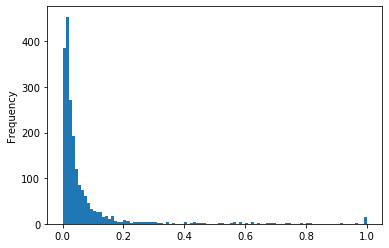

In [114]:
population_fig, population_axes = matplotlib.pyplot.subplots()
UCR["population"].plot.hist(bins=100, ax=population_axes)

Often when exploring data, we're on the lookout for correlated variables. As always correlation doesn't equal causation. [correlation](https://imgs.xkcd.com/comics/correlation.png)

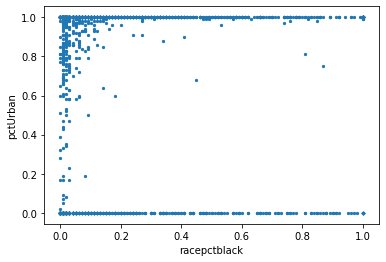

In [115]:
UCR.plot.scatter(x="racepctblack", y="pctUrban", marker=".")

Up to now we've picked out columns or rows by designating them explicitly. We can also pick out all the columns and/or rows that satisfy some criterion. 
To ask for all the rows where UCR.ViolentCrimesPerPop is equal to one we ask for 
`UCR.ViolentCrimesPerPop==1`

NOTA BENE that we used two equals signs `==` not one `=`.

We can then pull out only those rows--all the `True`s above. To get just the names of communities with `UCR.ViolentCrimesPerPop==1` we can ask:

In [116]:
UCR.communityname[UCR.ViolentCrimesPerPop == 1]

81                Vernoncity
145           BatonRougecity
148            PlantCitycity
247          Spartanburgcity
332         AtlanticCitycity
361           Birminghamcity
399            Mansfieldcity
409           FortPiercecity
412            Baltimorecity
419             Annistoncity
446        Irvingtontownship
456            Homesteadcity
461             Commercecity
498        SanBernardinocity
563           LosAngelescity
666              Atlantacity
677                Daniacity
775           EastOrangecity
809              Palatkacity
827       Wilkinsburgborough
840             SanPablocity
908           KansasCitycity
954             Prichardcity
956        WestHollywoodcity
997              Lynwoodcity
1000             Opelikacity
1024           Greenwoodcity
1040        PompanoBeachcity
1043          Washingtoncity
1055           Hawthornecity
1118            Bessemercity
1133               Miamicity
1153             Chestercity
1158             Oaklandcity
1207    Cityof

We can also just pull all the ROWS that satify such a condition.

In [117]:
UCR.loc[UCR["ViolentCrimesPerPop"] == 1.0]

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
81,48,?,?,Vernoncity,1,0.00,0.42,0.21,0.65,0.04,...,0.02,0.12,0.02,?,?,?,?,0.00,?,1.0
145,22,?,?,BatonRougecity,1,0.34,0.43,0.86,0.30,0.10,...,0.21,0.25,0.11,0.55,0.07,0.42,0.5,0.35,0.13,1.0
148,12,?,?,PlantCitycity,1,0.02,0.47,0.41,0.63,0.03,...,0.06,0.09,0.00,?,?,?,?,0.00,?,1.0
247,45,?,?,Spartanburgcity,2,0.05,0.41,0.89,0.28,0.05,...,0.05,0.20,0.13,0.03,0.01,0.84,0,1.00,0.16,1.0
332,34,1,2080,AtlanticCitycity,2,0.04,0.31,1.00,0.01,0.24,...,0.03,0.28,1.00,?,?,?,?,0.00,?,1.0
361,1,?,?,Birminghamcity,2,0.41,0.37,1.00,0.02,0.03,...,0.43,0.15,0.20,0.36,0.13,0.74,0.5,0.38,0.2,1.0
399,39,139,47138,Mansfieldcity,3,0.07,0.36,0.35,0.71,0.04,...,0.08,0.15,0.07,?,?,?,?,0.00,?,1.0
409,12,?,?,FortPiercecity,3,0.04,0.41,0.83,0.29,0.03,...,0.03,0.25,0.17,?,?,?,?,0.00,?,1.0
412,24,510,4000,Baltimorecity,3,1.00,0.44,1.00,0.07,0.06,...,0.23,0.76,1.00,0.67,0.58,0.74,0,0.36,0.34,1.0
419,1,?,?,Annistoncity,3,0.03,0.34,0.86,0.30,0.04,...,0.06,0.11,0.04,?,?,?,?,0.00,?,1.0


# Problems
### Problem 1 (10 points)

Import the life.expectancy.countries.csv file into a pandas dataframe entitled "lifeexpectancy". Rename the column titles of this data frame using the list below entitled "column_names". Use the code provided below to help you do this. Also be sure to drop the first row of your CSV using the following code: 

`lifeexpectancy = lifeexpectancy.drop(lifeexpectancy.index[[0]])`  

In [118]:
column_names = ["country", "year", "life expectancy at birth (both sexes)", \
                          "life expectancy at birth (female)", "life expectancy at birth (male)", \
                          "life expectancy at age 60 (both sexes)", "life expectancy at age 60 (female)", \
                          "life expectancy at age 60 (male)"]

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [120]:
# Read file
lifeexpectancy = pandas.read_csv("life.expectancy.countries.csv")

# Drop header
lifeexpectancy = lifeexpectancy.drop(lifeexpectancy.index[[0]])

# Rename cols
lifeexpectancy.columns = column_names

# Print / Preview
lifeexpectancy


,country,year,life expectancy at birth (both sexes),life expectancy at birth (female),life expectancy at birth (male),life expectancy at age 60 (both sexes),life expectancy at age 60 (female),life expectancy at age 60 (male)
1,Afghanistan,2015,60.5,61.9,59.3,16.0,16.7,15.3
2,Afghanistan,2014,59.9,61.3,58.6,15.9,16.6,15.2
3,Afghanistan,2013,59.9,61.2,58.7,15.9,16.6,15.2
4,Afghanistan,2012,59.5,60.8,58.3,15.8,16.5,15.1
5,Afghanistan,2011,59.2,60.4,58.0,15.8,16.5,15.1
...,...,...,...,...,...,...,...,...
2935,Zimbabwe,2004,44.3,43.8,44.8,16.0,16.5,15.4
2936,Zimbabwe,2003,44.5,44.1,44.9,16.0,16.6,15.5
2937,Zimbabwe,2002,44.8,44.5,45.1,16.1,16.6,15.5
2938,Zimbabwe,2001,45.3,45.2,45.5,16.1,16.7,15.5


<b>Important</b>: For the current version of pandas, when you import "life.expectancy.countries.csv" into pandas in the usual manner, it sets all the life expectancy ages (i.e., columns 2 - 7) as "objects" instead of "floats". To fix this, be sure to run the following line of code once you've <b>finished</b> question 1 but before you begin question 2: 

In [121]:
lifeexpectancy.loc[:, 'life expectancy at birth (both sexes)':] = lifeexpectancy.loc[:, 'life expectancy at birth (both sexes)':].astype(float)

### Problem 2 (10 points) 

How many different _countries_ do you have data for? How many different years of life expectancy data do you have for each country? 

In [122]:
# Unique Countries
num_countries = lifeexpectancy["country"].nunique()
print ("Countries: " + str(num_countries))

# Unique Years
lifeexpectancy

Countries: 194


,country,year,life expectancy at birth (both sexes),life expectancy at birth (female),life expectancy at birth (male),life expectancy at age 60 (both sexes),life expectancy at age 60 (female),life expectancy at age 60 (male)
1,Afghanistan,2015,60.5,61.9,59.3,16,16.7,15.3
2,Afghanistan,2014,59.9,61.3,58.6,15.9,16.6,15.2
3,Afghanistan,2013,59.9,61.2,58.7,15.9,16.6,15.2
4,Afghanistan,2012,59.5,60.8,58.3,15.8,16.5,15.1
5,Afghanistan,2011,59.2,60.4,58,15.8,16.5,15.1
...,...,...,...,...,...,...,...,...
2935,Zimbabwe,2004,44.3,43.8,44.8,16,16.5,15.4
2936,Zimbabwe,2003,44.5,44.1,44.9,16,16.6,15.5
2937,Zimbabwe,2002,44.8,44.5,45.1,16.1,16.6,15.5
2938,Zimbabwe,2001,45.3,45.2,45.5,16.1,16.7,15.5


### Problem 3 (5 points)

Using pandas, make a new dataframe that contains all the data for Brazil. 

Hint: the following pseudocode gives you a general idea of what you need to do: 

<code> lifeexpectancy[lifeexpectancy['column title']=='Name_of_Country']</code>.

In [123]:
# Create df
brazil_df = lifeexpectancy[ lifeexpectancy['country']=='Brazil' ]

# Print df
brazil_df

,country,year,life expectancy at birth (both sexes),life expectancy at birth (female),life expectancy at birth (male),life expectancy at age 60 (both sexes),life expectancy at age 60 (female),life expectancy at age 60 (male)
354,Brazil,2015,75,78.7,71.4,21.7,23.3,19.8
355,Brazil,2014,74.8,78.5,71.2,21.5,23.2,19.6
356,Brazil,2013,74.7,78.4,71.1,21.4,23.1,19.5
357,Brazil,2012,74.5,78.2,70.9,21.3,22.9,19.4
358,Brazil,2011,74.1,77.7,70.5,20.9,22.5,19
359,Brazil,2010,73.8,77.5,70.2,20.7,22.3,18.8
360,Brazil,2009,73.6,77.3,70,20.7,22.3,18.8
361,Brazil,2008,73.4,77.1,69.8,20.5,22.2,18.7
362,Brazil,2007,73.3,76.9,69.7,20.4,22,18.6
363,Brazil,2006,73,76.6,69.4,20.3,21.9,18.4


### Problem 4 (5 points)

Plot life expectancy (from birth, "both sexes") as a function of year for Brazil using the dataframe you constructed in question 3.  

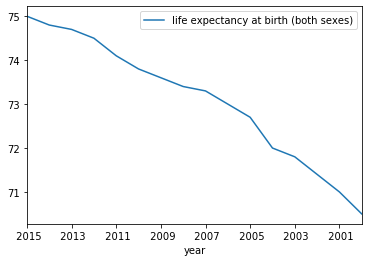

In [124]:
# Plot year x life @ birth
brazil_df.plot(x='year', y='life expectancy at birth (both sexes)')

### Problem 5 (10 points)

Which country has the highest life expectancy (from birth) for men, women, and both sexes? What are the associated years for each of these life expectancies? (Be sure to show your code!)

In [125]:
# Used: https://stackoverflow.com/questions/34734940/row-wise-average-for-a-subset-of-columns-with-missing-values

# Cols to calculate
cols_to_calc = ['life expectancy at birth (both sexes)', 'life expectancy at birth (female)', 'life expectancy at birth (male)']

# Calculate avg for 3 columns
lifeexpectancy['life expectancy at birth (average)'] = lifeexpectancy[cols_to_calc].mean(axis=1)

# Get index of max
i = lifeexpectancy['life expectancy at birth (average)'].astype(float).idxmax()

# Get row from index
highest_country = lifeexpectancy.iloc[i]

# Print row
highest_country

country                                   Japan
year                                       2014
life expectancy at birth (both sexes)      83.5
life expectancy at birth (female)          86.7
life expectancy at birth (male)            80.3
life expectancy at age 60 (both sexes)       26
life expectancy at age 60 (female)         28.6
life expectancy at age 60 (male)           23.2
life expectancy at birth (average)         83.5
Name: 1317, dtype: object

### Problem 6 (15 points)

Pick 3 countries you'd like to compare, and plot their life expectancies (from birth, "both sexes") on the same graph.  

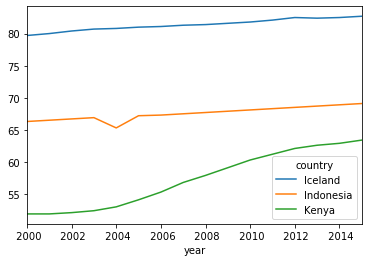

In [126]:
# https://stackoverflow.com/questions/29233283/plotting-multiple-lines-with-pandas-dataframe

# define countries
three_countries = ['Iceland', 'Indonesia', 'Kenya']

# Reduce df to just the 3 counties
lifeexpectancy_justthree = lifeexpectancy[lifeexpectancy['country'].isin(three_countries)]

# pivot on the country
lifeexpectancy_justthree = lifeexpectancy_justthree.pivot(index='year', columns='country', values='life expectancy at birth (both sexes)')

# plot
lifeexpectancy_justthree.plot()

### Problem 7 (15 points)

Plot the _average life expectancy_ for _all_ countries as a function of year.  

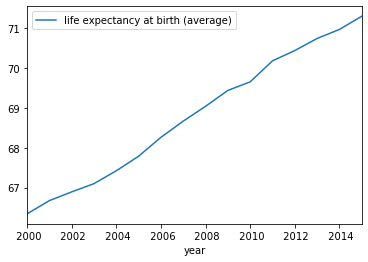

In [127]:
# Groupby year
lifeexpectancy_year = lifeexpectancy.groupby(['year']).mean()

# Plot
lifeexpectancy_year.plot()

### EXTRA CREDIT: Problem 8 (15 points extra credit)

Using life expectancy data for "both sexes" from birth, which country has the fastest growing life expectancy on average for all years provided? Likewise, which country has the slowest growing (or even fastest decreasing) life expectancy on average for all years provided? Using pandas, plot the life expectancy of these two countries as a function of year in the same graph. 

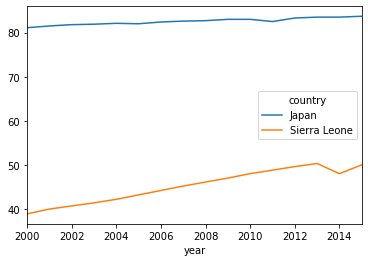

In [128]:
# TYPE ANSWER HERE

# HINT 1: 
# We're going to treat years as number, and in order to do this we need to change years to floats or ints.
# You don't have to solve it this way, but this is one way to do it.
# Note that some values are NaNs (i.e., "Not A Number"), which floats convert without warning, so do this with care...
lifeexpectancy.loc[:, 'year':] = lifeexpectancy.loc[:, 'year':].astype(float)  # Set years to floats

# HINT #2: 
# Determine slopes for all countries for entire time period of the data set.

# reduce df to needed rows
lifeexpectancy_countries = lifeexpectancy[['country', 'year', 'life expectancy at birth (both sexes)']]

# create new group
lifeexpectancy_countries = lifeexpectancy_countries.groupby(['country'])

# create row store
rows = []
for name, group in lifeexpectancy_countries:
    avg = group['life expectancy at birth (both sexes)'].mean()
    rows.append({'country': name, 'slope': avg})

# init new frame from rows
growth = pd.DataFrame(rows)

# HINT #3:
# Identify which which country has the most positive slope and which country has the most negative slope

# find max/min country
fastest = growth.iloc[growth['slope'].idxmax()]['country']
slowest = growth.iloc[growth['slope'].idxmin()]['country']

# HINT #4:
# Graph both countries in the same plot

# define countries
two_countries = [fastest, slowest]

# Reduce df to just the 2 counties
lifeexpectancy_justtwo = lifeexpectancy[lifeexpectancy['country'].isin(two_countries)]

# pivot on the country
lifeexpectancy_justtwo = lifeexpectancy_justtwo.pivot(index='year', columns='country', values='life expectancy at birth (both sexes)')

# plot
lifeexpectancy_justtwo.plot()